# Implementing Linear Regression\

1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediciton
    - backward pass: gradients (pytorch does this automatically)
    - update weights


In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

/Users/natitaw/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# 0. prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, 
                                            n_features=1, noise=20,
                                           random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshape
y = y.view(y.shape[0], 1) # view method used to reshape tensor

n_samples, n_features = X.shape

epoch: 10, loss = 4362.7305
epoch: 20, loss = 3256.7180
epoch: 30, loss = 2456.0537
epoch: 40, loss = 1875.8397
epoch: 50, loss = 1454.9783
epoch: 60, loss = 1149.4353
epoch: 70, loss = 927.4318
epoch: 80, loss = 766.0070
epoch: 90, loss = 648.5499
epoch: 100, loss = 563.0309


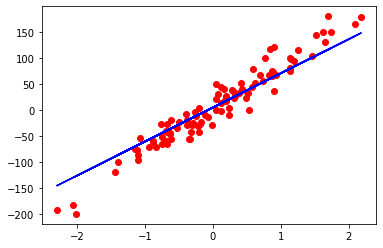

In [5]:
# 1. model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. loss optimizer
learning_rate = 0.01
criterion = nn.MSELoss() # this will calculate the MSE
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100

# forward pass: compute prediciton
# backward pass: gradients (pytorch does this automatically)
# update weights
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward() # this does the back prop and calculate grads
    
    #update
    optimizer.step()
    #empty
    optimizer.zero_grad()
    
    # print some information
    if (epoch+1) % 10 == 0: #every 10th step
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
# plot
# detaching tensor so that it is not tracked in the computation graph
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()